# **NOMS I COGNOMS:** Junjie Li, Manuel Liu Wang

## **GRUP DE LABORATORI:** A


### Aquest script Python s'utilitza principalment per a la primera pregunta a la pràctica2: 
> ## taules de càlcul i visualització de la gràfica

In [2]:
import math

ESP8266 = [-33, -55, -63, -66, -79, -72, -70, -73]
P_t_x = 1 / 1000
G_t_x = 1
G_r_x = 1
_eta = 1
_C = 299792458
f = 2.4 
GHzToHz = 1e9
pi =  math.pi
_lambda = _C / (f * GHzToHz) 

def mWattTodBm(mWatt):
    return 10 * math.log(mWatt,10) + 30 if mWatt else 0.0

res = dict()
idea = []

for dist in range(8):
    Watt = P_t_x * G_t_x * G_r_x * math.pow(( _lambda / (4 * pi * dist) ), 2) *_eta if dist else 0.0
    mWatt = Watt / 1000
    dBm = mWattTodBm(mWatt)
    print(f"mWatt {mWatt} dBm : {dBm}")

    res[dist] = (ESP8266[dist], dBm)
    idea.append(dBm)


mWatt 0.0 dBm : 0.0
mWatt 9.880961210318493e-11 dBm : -70.05200805611548
mWatt 2.4702403025796232e-11 dBm : -76.07260796939511
mWatt 1.0978845789242766e-11 dBm : -79.59443315050873
mWatt 6.175600756449058e-12 dBm : -82.09320788267473
mWatt 3.9523844841273976e-12 dBm : -84.03140814283586
mWatt 2.7447114473106916e-12 dBm : -85.61503306378836
mWatt 2.0165226959833656e-12 dBm : -86.95396885640062


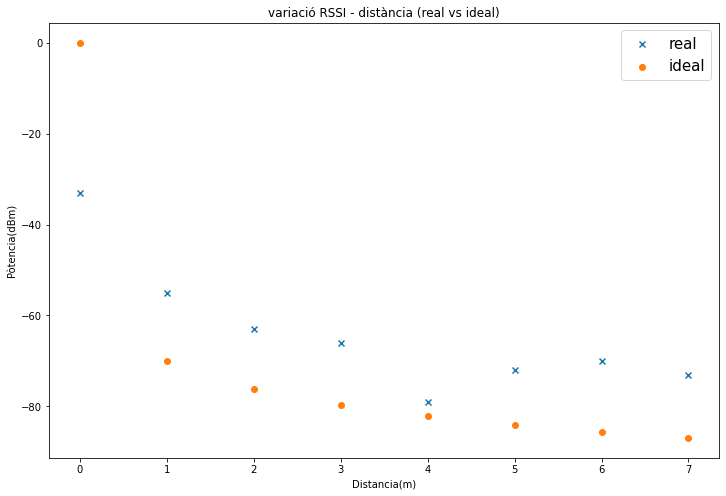

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(12,8))

real_x = idea_x = np.arange(0, 8, 1)
real_y = ESP8266
plt.scatter(real_x, real_y, marker='x',label='real')

idea_y = idea
plt.scatter(idea_x, idea_y, marker='o',label='ideal')
plt.legend(fontsize=15)
plt.title("variació RSSI - distància (real vs ideal)")
plt.xlabel('Distancia(m)')
plt.ylabel('Pòtencia(dBm)')
plt.show()



### Calcular la potència teòrica amb η diferents

In [12]:
etalist = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]

alldata = []
for _eta in etalist:
    print(f"eta: {_eta}")
    temp = []
    for dist in range(1, 8):
        Watt = P_t_x * G_t_x * G_r_x * math.pow(( _lambda / (4 * pi * dist) ), 2) *_eta if dist else 0.0
        mWatt = Watt / 1000
        temp.append(mWatt)
    alldata.append(temp)

alldata

eta: 0.1
eta: 0.2
eta: 0.3
eta: 0.4
eta: 0.5
eta: 0.6
eta: 0.7
eta: 0.8
eta: 0.9
eta: 1


[[9.880961210318493e-12,
  2.4702403025796233e-12,
  1.0978845789242767e-12,
  6.175600756449058e-13,
  3.9523844841273977e-13,
  2.7447114473106917e-13,
  2.0165226959833658e-13],
 [1.9761922420636986e-11,
  4.9404806051592466e-12,
  2.1957691578485534e-12,
  1.2351201512898116e-12,
  7.904768968254795e-13,
  5.489422894621383e-13,
  4.0330453919667315e-13],
 [2.9642883630955475e-11,
  7.410720907738869e-12,
  3.29365373677283e-12,
  1.852680226934717e-12,
  1.1857153452382191e-12,
  8.234134341932075e-13,
  6.049568087950097e-13],
 [3.952384484127397e-11,
  9.880961210318493e-12,
  4.391538315697107e-12,
  2.4702403025796233e-12,
  1.580953793650959e-12,
  1.0978845789242767e-12,
  8.066090783933463e-13],
 [4.9404806051592464e-11,
  1.2351201512898116e-11,
  5.489422894621383e-12,
  3.087800378224529e-12,
  1.9761922420636988e-12,
  1.3723557236553458e-12,
  1.0082613479916828e-12],
 [5.928576726191095e-11,
  1.4821441815477737e-11,
  6.58730747354566e-12,
  3.705360453869434e-12,
  

### A partir de l’expressió teòrica i les dades experimentals, feu també la regressió per tal d’obtenir el millor valor possible de η.

> Recordeu que η varia entre 0 i 1

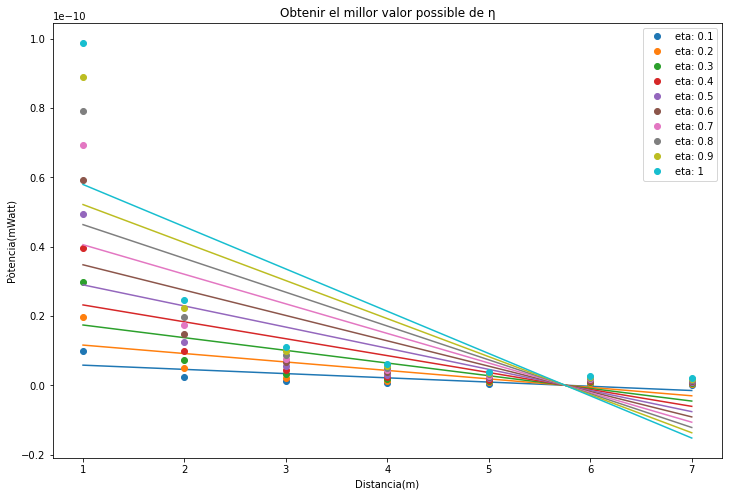

In [45]:
x = np.arange(1, 8, 1)
color = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]


plt.figure(figsize=(12,8))
for i in range(10):
    y = alldata[i]
    plt.plot(x, y, color[i]+"o", label=f"eta: {etalist[i]}")
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)), color=color[i])

plt.title("Obtenir el millor valor possible de η")
plt.xlabel('Distancia(m)')
plt.ylabel('Pòtencia(mWatt)')
plt.legend(loc='upper right', frameon=True)
plt.show()